#  Préparation et nettoyage des données sur les délinquences

## Introduction

### Objectif de ce notebook

<!-- COMPLÉTEZ ICI: Nettoyer les données de délinquence par commune-->
<!-- Ce notebook a pour objectif de préparer les données de délinquence par commune -->

### Sources de données utilisées

<!-- - https://www.data.gouv.fr/datasets/bases-statistiques-communale-departementale-et-regionale-de-la-delinquance-enregistree-par-la-police-et-la-gendarmerie-nationales-->


---

## Import des bibliothèques


In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Utilitaires
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')


---

## Chargement des données brutes

### Chargement du fichier Delinquence et de l'INSEE

In [2]:
def load_data():
    df = pd.read_csv("data/donnee-data.gouv-2024-geographie2025-produit-le2025-06-04.csv", sep=';', low_memory=False)
    insee = pd.read_csv("data/v_commune_depuis_1943.csv", sep=',')
    return df, insee

df, insee = load_data()


## Affichage des infos de bases du fichier de délinquance

In [3]:
# Affichage des informations de base

def display_basic_info(df,dataset_name= "Dataset"):
    
    print(f"\nStructure du dataset : {dataset_name}")
    
    print("=== Dimensions du DataFrame ===")
    print(f"Nombre de lignes : {df.shape[0]}")
    print(f"Nombre de colonnes : {df.shape[1]}")
    
    print("=== Noms des colonnes ===:")
    print(df.columns.tolist())
    
    print("=== Types de colonnes ===")
    print(df.dtypes, "\n")
    
    print("=== Valeurs manquantes par colonne ===")
    print(df.isnull().sum(), "\n")
    
    print("=== Aperçu des premières lignes ===")
    print(df.head())
    
display_basic_info(df, "Delinquence")
display_basic_info(insee, "Source insee")


Structure du dataset : Delinquence
=== Dimensions du DataFrame ===
Nombre de lignes : 4714200
Nombre de colonnes : 13
=== Noms des colonnes ===:
['CODGEO_2025', 'annee', 'indicateur', 'unite_de_compte', 'nombre', 'taux_pour_mille', 'est_diffuse', 'insee_pop', 'insee_pop_millesime', 'insee_log', 'insee_log_millesime', 'complement_info_nombre', 'complement_info_taux']
=== Types de colonnes ===
CODGEO_2025                object
annee                       int64
indicateur                 object
unite_de_compte            object
nombre                    float64
taux_pour_mille            object
est_diffuse                object
insee_pop                   int64
insee_pop_millesime         int64
insee_log                   int64
insee_log_millesime         int64
complement_info_nombre     object
complement_info_taux       object
dtype: object 

=== Valeurs manquantes par colonne ===
CODGEO_2025                     0
annee                           0
indicateur                      0
unite

### Analyse des colonnes

<!-- COMPLÉTEZ ICI: Décrivez les colonnes principales du dataset DVF -->
<!-- Exemple: -->
<!-- - date_mutation: date de la transaction -->
<!-- - valeur_fonciere: prix de vente -->
<!-- - type_local: appartement, maison, etc. -->
<!-- - surface_reelle_bati: surface en m² -->
<!-- - nombre_pieces_principales: nombre de pièces -->
<!-- - code_postal, commune -->

In [4]:
def analyze_columns(df, dataset_name="Dataset"):
   
    print(f"\n Analyse des colonnes pour : {dataset_name}")
    
    # Boucle sur chaque colonne
    for col in df.columns:
        print(f"\n Colonne : {col}")
        print(f"   ➜ Type : {df[col].dtype}")
        print(f"   ➜ Valeurs manquantes : {df[col].isna().sum()}")
        print(f"   ➜ Valeurs uniques : {df[col].nunique()}")
        
        # Affiche les 5 valeurs les plus fréquentes (hors valeurs manquantes)
        top_values = df[col].value_counts(dropna=True).head(5)
        print("   ➜ Valeurs les plus fréquentes :")
        for val, freq in top_values.items():
            print(f"       {val} → {freq} occurrences")
    

analyze_columns(df, " Delinquence")




 Analyse des colonnes pour :  Delinquence

 Colonne : CODGEO_2025
   ➜ Type : object
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 34920
   ➜ Valeurs les plus fréquentes :
       01001 → 135 occurrences
       61264 → 135 occurrences
       61258 → 135 occurrences
       61259 → 135 occurrences
       61260 → 135 occurrences

 Colonne : annee
   ➜ Type : int64
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 9
   ➜ Valeurs les plus fréquentes :
       2016 → 523800 occurrences
       2017 → 523800 occurrences
       2018 → 523800 occurrences
       2019 → 523800 occurrences
       2020 → 523800 occurrences

 Colonne : indicateur
   ➜ Type : object
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 15
   ➜ Valeurs les plus fréquentes :
       Violences physiques intrafamiliales → 314280 occurrences
       Violences physiques hors cadre familial → 314280 occurrences
       Violences sexuelles → 314280 occurrences
       Vols avec armes → 314280 occurrences
       Vols violents sa



## Sélection des colonnes pertinentes

In [5]:
def select_relevant_columns(df):
    
     # --- Delinquences ---
    df = df.rename(columns={
        'CODGEO_2025': 'code_commune',
        'annee': 'annee_donnees',
        'indicateur': 'type_delinquance',
        'nombre': 'nb_faits',
        'taux_pour_mille': 'taux_1000_habitants',
        'insee_pop' : 'population_commune',
        'insee_log': 'nb_logements',
        'unite_de_compte': 'unite_compte',
        
    })[['code_commune', 'annee_donnees', 'type_delinquance','nb_faits','taux_1000_habitants','population_commune','nb_logements','unite_compte']]


    print(" Colonnes pertinentes sélectionnées avec succès")
    print(f"→ Délinquences: {list(df.columns)}")
    

    return df



df= select_relevant_columns(df)

 Colonnes pertinentes sélectionnées avec succès
→ Délinquences: ['code_commune', 'annee_donnees', 'type_delinquance', 'nb_faits', 'taux_1000_habitants', 'population_commune', 'nb_logements', 'unite_compte']


### Conversion des types de données

###  Transforme les colonnes du DataFrame en types adaptés pour l'analyse.
 

In [6]:
def convert_column_types(df):
    """
    Transforme les colonnes du DataFrame en types adaptés pour l'analyse.
    """
    df = df.copy()
    
    # Colonnes texte
    df['code_commune'] = df['code_commune'].astype('string')
    df['type_delinquance'] = df['type_delinquance'].astype('string')
    df['unite_compte'] = df['unite_compte'].astype('string')
    
    # Colonnes numériques
    df['nb_faits'] = pd.to_numeric(df['nb_faits'], errors='coerce')
    df['taux_1000_habitants'] = pd.to_numeric(df['taux_1000_habitants'], errors='coerce') 
    df['population_commune'] = pd.to_numeric(df['population_commune'], errors='coerce')
    df['nb_logements'] = pd.to_numeric(df['nb_logements'], errors='coerce')
    
    print("Transformation des types effectuée")
    print(df.dtypes)
    
    return df

df = convert_column_types(df)


Transformation des types effectuée
code_commune           string[python]
annee_donnees                   int64
type_delinquance       string[python]
nb_faits                      float64
taux_1000_habitants           float64
population_commune              int64
nb_logements                    int64
unite_compte           string[python]
dtype: object


### Suppression des valeurs manquantes critiques

In [7]:
def clean_missing_values(df):
    """
    1. Recalcule le taux si manquant mais nb_faits et population existent
    2. Met taux = 0 si nb_faits = 0
    3. Supprime les lignes où nb_faits OU population sont manquants
    4. GARDE les lignes où nb_faits = 0 (commune sûre)
    """
    print(f"Lignes avant nettoyage : {len(df):,}")
    
    # 1. Recalcule le taux si manquant (NaN) mais données disponibles
    mask_taux_manquant = (
        df['taux_1000_habitants'].isna() & 
        df['nb_faits'].notna() & 
        df['population_commune'].notna() &
        (df['population_commune'] > 0)
    )
    
    print(f"\nLignes avec taux manquant mais données disponibles: {mask_taux_manquant.sum():,}")
    
    # Recalcul du taux pour ces lignes
    df.loc[mask_taux_manquant, 'taux_1000_habitants'] = (
        df.loc[mask_taux_manquant, 'nb_faits'] / 
        df.loc[mask_taux_manquant, 'population_commune']
    ) * 1000
    
    print(f" Taux recalculés pour {mask_taux_manquant.sum()} lignes")
    
    # 2. Mettre taux = 0 pour les cas où nb_faits = 0 (communes sûres)
    mask_zero_faits = (
        df['taux_1000_habitants'].isna() & 
        (df['nb_faits'] == 0)
    )
    df.loc[mask_zero_faits, 'taux_1000_habitants'] = 0
    print(f" Taux mis à 0 pour nb_faits = 0: {mask_zero_faits.sum():,}")
    
    # 3. Supprime les lignes où nb_faits ou population sont VRAIMENT manquants (NaN)
    avant_suppression = len(df)
    df = df.dropna(subset=['nb_faits', 'population_commune', 'taux_1000_habitants'])
    
    print(f" Lignes supprimées (données manquantes) : {avant_suppression - len(df):,}")
    
    # 4. Supprime uniquement les lignes aberrantes (population = 0)
    avant_pop_zero = len(df)
    df = df[df['population_commune'] > 0]
    print(f" Lignes supprimées (population = 0) : {avant_pop_zero - len(df):,}")
    
    # 5. Vérifie les lignes avec nb_faits = 0 (on les garde !)
    nb_zero_faits = (df['nb_faits'] == 0).sum()
    print(f"ℹ  Lignes conservées avec nb_faits = 0 (communes sûres) : {nb_zero_faits:,}")
    
    print(f"\n Lignes finales après nettoyage : {len(df):,}")
    
    # Vérification finale
    print("\n=== Valeurs manquantes restantes ===")
    missing_summary = df[['nb_faits', 'taux_1000_habitants', 'population_commune']].isnull().sum()
    print(missing_summary)
    
    if missing_summary.sum() > 0:
        print("\n ATTENTION: Il reste des valeurs manquantes!")
    else:
        print("\n Aucune valeur manquante!")
    
    # Stats sur les valeurs
    print(f"\n=== Distribution de nb_faits ===")
    print(f"   - Minimum : {df['nb_faits'].min()}")
    print(f"   - Maximum : {df['nb_faits'].max()}")
    print(f"   - Communes avec 0 fait : {(df['nb_faits'] == 0).sum():,}")
    print(f"   - Communes avec > 0 faits : {(df['nb_faits'] > 0).sum():,}")
    
    print(f"\n=== Distribution de taux_1000_habitants ===")
    print(f"   - Minimum : {df['taux_1000_habitants'].min():.2f}")
    print(f"   - Maximum : {df['taux_1000_habitants'].max():.2f}")
    print(f"   - Moyenne : {df['taux_1000_habitants'].mean():.2f}")
    print(f"   - Médiane : {df['taux_1000_habitants'].median():.2f}")
    
    return df

# Utilisation
df_clean = clean_missing_values(df)

Lignes avant nettoyage : 4,714,200

Lignes avec taux manquant mais données disponibles: 2,539,023
 Taux recalculés pour 2539023 lignes
 Taux mis à 0 pour nb_faits = 0: 763
 Lignes supprimées (données manquantes) : 2,174,414
 Lignes supprimées (population = 0) : 763
ℹ  Lignes conservées avec nb_faits = 0 (communes sûres) : 2,151,601

 Lignes finales après nettoyage : 2,539,023

=== Valeurs manquantes restantes ===
nb_faits               0
taux_1000_habitants    0
population_commune     0
dtype: int64

 Aucune valeur manquante!

=== Distribution de nb_faits ===
   - Minimum : 0.0
   - Maximum : 162378.0
   - Communes avec 0 fait : 2,151,601
   - Communes avec > 0 faits : 387,422

=== Distribution de taux_1000_habitants ===
   - Minimum : 0.00
   - Maximum : 1565.22
   - Moyenne : 0.77
   - Médiane : 0.00


### Suppression des doublons

In [8]:
def remove_duplicates(df, subset=None):
    """
    Supprime les doublons.
    - subset : liste des colonnes sur lesquelles vérifier les doublons (None = toutes les colonnes)
    Affiche l'état du DataFrame avant et après suppression.
    """
    print("\n État avant suppression des doublons :")
    print(f"Nombre de lignes : {len(df):,}")
    print(df.head())

    # Compter les doublons
    if subset is None:
        doublons = df.duplicated()
    else:
        doublons = df.duplicated(subset=subset)
    print(f"\n Doublons détectés : {doublons.sum():,}")

    # Suppression
    df = df.drop_duplicates(subset=subset)
    print(f"\n État après suppression des doublons :")
    print(f"Nombre de lignes : {len(df):,}")
    print(df.head())
    print(f"→ Total doublons supprimés : {doublons.sum():,}")

    return df


df_clean = remove_duplicates(df_clean, subset=['code_commune', 'type_delinquance','annee_donnees'])




 État avant suppression des doublons :
Nombre de lignes : 2,539,023
  code_commune  annee_donnees                     type_delinquance  nb_faits  \
0        01001           2016  Violences physiques intrafamiliales       0.0   
2        01001           2016                  Violences sexuelles       0.0   
3        01001           2016                      Vols avec armes       0.0   
4        01001           2016              Vols violents sans arme       0.0   
8        01001           2016              Vols dans les véhicules       0.0   

   taux_1000_habitants  population_commune  nb_logements unite_compte  
0                  0.0                 767           348      Victime  
2                  0.0                 767           348      Victime  
3                  0.0                 767           348   Infraction  
4                  0.0                 767           348   Infraction  
8                  0.0                 767           348     Véhicule  

 Doublons détecté

### Filtrage sur les données en IDF et rajout des noms du départements

In [9]:
def filter_idf_communes(df):
    """
    Filtre les communes d'Île-de-France et ajoute le nom des départements.
    """
    print("FILTRAGE DES COMMUNES ÎLE-DE-FRANCE")

    # Extraction du code département
    df['departement'] = df['code_commune'].astype(str).str[:2]

    # Départements IDF
    dept_idf = ['75', '77', '78', '91', '92', '93', '94', '95']
    df_idf = df[df['departement'].isin(dept_idf)].copy()

    # Dictionnaire de correspondance
    mapping_dept = {
        '75': 'Paris',
        '77': 'Seine-et-Marne',
        '78': 'Yvelines',
        '91': 'Essonne',
        '92': 'Hauts-de-Seine',
        '93': 'Seine-Saint-Denis',
        '94': 'Val-de-Marne',
        '95': "Val-d'Oise"
    }

    # Ajout du nom du département
    df_idf['nom_departement'] = df_idf['departement'].map(mapping_dept)

    # Résumé simple
    total_communes = df_idf['code_commune'].nunique()
    total_departements = df_idf['departement'].nunique()
    print(f"Communes IDF : {total_communes}")
    print(f"Départements trouvés : {total_departements}\n")

    # Groupement par département (avec les codes communes)
    print("Communes par département:")
    resume = df_idf.groupby('nom_departement')['code_commune'].nunique().reset_index()
    print(resume.to_string(index=False))

    return df_idf

# Utilisation
df_idf = filter_idf_communes(df_clean)


FILTRAGE DES COMMUNES ÎLE-DE-FRANCE
Communes IDF : 1286
Départements trouvés : 8

Communes par département:
  nom_departement  code_commune
          Essonne           194
   Hauts-de-Seine            36
            Paris            21
Seine-Saint-Denis            39
   Seine-et-Marne           507
       Val-d'Oise           183
     Val-de-Marne            47
         Yvelines           259


## Préparation des données de l'INSEE

In [10]:
def prepare_insee_data(insee):
    
    insee_clean = insee[['COM', 'LIBELLE']].copy()
    
    insee_clean = insee_clean.rename(columns={
        'COM': 'code_commune',
        'LIBELLE': 'nom_commune'
    })
    
    # Supprimer les doublons (garder la version la plus récente)
    avant = len(insee_clean)
    insee_clean = insee_clean.drop_duplicates(subset='code_commune', keep='last')
    apres = len(insee_clean)
    
    print(f" Lignes avant dédoublonnage : {avant:,}")
    print(f" Lignes après dédoublonnage : {apres:,}")
    print(f" Doublons supprimés : {avant - apres:,}")
    print(f" Communes uniques : {insee_clean['code_commune'].nunique():,}\n")
    
    print("Aperçu des données INSEE :")
    print(insee_clean.head(10))
    
    return insee_clean

insee = prepare_insee_data(insee)

 Lignes avant dédoublonnage : 42,314
 Lignes après dédoublonnage : 39,162
 Doublons supprimés : 3,152
 Communes uniques : 39,162

Aperçu des données INSEE :
   code_commune              nom_commune
0         01001  L'Abergement-Clémenciat
1         01002    L'Abergement-de-Varey
2         01003                 Amareins
4         01004        Ambérieu-en-Bugey
5         01005      Ambérieux-en-Dombes
6         01006                  Ambléon
7         01007                 Ambronay
8         01008                 Ambutrix
9         01009         Andert-et-Condon
10        01010                Anglefort


## Obtenir le nom des communes dans le fichier délinquances

In [11]:
def merge_commune_names(df, insee):
    
    print("\n FUSION DES NOMS DE COMMUNES")
    
    avant = len(df)
    df_merged = df.merge(insee, on='code_commune', how='left')
    apres = len(df_merged)
    
    sans_nom = df_merged['nom_commune'].isna().sum()
    
    print(f" Lignes avant fusion : {avant:,}")
    print(f" Lignes après fusion : {apres:,}")
    print(f" Communes sans nom trouvé : {sans_nom:,}")
    
    if sans_nom > 0:
        print("\n Codes communes sans correspondance :")
        print(df_merged.loc[df_merged['nom_commune'].isna(), 'code_commune'].unique()[:10])
    
    #  Affichage unique de la correspondance code → nom
    correspondance_unique = df_merged[['code_commune', 'nom_commune']].drop_duplicates().sort_values('code_commune')
    print("\n Liste complète des correspondances code → nom :")
    print(correspondance_unique.to_string(index=False))
    
    return df_merged


df_idf= merge_commune_names(df_idf, insee)



 FUSION DES NOMS DE COMMUNES
 Lignes avant fusion : 92,918
 Lignes après fusion : 92,918
 Communes sans nom trouvé : 0

 Liste complète des correspondances code → nom :
code_commune                  nom_commune
       75056                        Paris
       75101     Paris 1er Arrondissement
       75102      Paris 2e Arrondissement
       75103      Paris 3e Arrondissement
       75104      Paris 4e Arrondissement
       75105      Paris 5e Arrondissement
       75106      Paris 6e Arrondissement
       75107      Paris 7e Arrondissement
       75108      Paris 8e Arrondissement
       75109      Paris 9e Arrondissement
       75110     Paris 10e Arrondissement
       75111     Paris 11e Arrondissement
       75112     Paris 12e Arrondissement
       75113     Paris 13e Arrondissement
       75114     Paris 14e Arrondissement
       75115     Paris 15e Arrondissement
       75116     Paris 16e Arrondissement
       75117     Paris 17e Arrondissement
       75118     Paris 18e Arron

## Supprimer les communes regroupant les autres communes

In [12]:
# Supprimer la commune agrégée Paris (75056)
df_idf = df_idf[df_idf['code_commune'] != '75056'].copy()

# Nombre de départements IDF restants
departements_idf = sorted(df_idf['departement'].unique())
print(f"Départements IDF restants : {departements_idf}")
print(f"Nombre de départements : {len(departements_idf)}")

# Nombre de communes IDF restantes
communes_idf = df_idf['code_commune'].unique()
print(f"Nombre total de communes IDF : {len(communes_idf)}")


Départements IDF restants : ['75', '77', '78', '91', '92', '93', '94', '95']
Nombre de départements : 8
Nombre total de communes IDF : 1285


## Vérification des listes des communes
### Affichage des noms de communes par départements

In [13]:
def afficher_communes_par_departement(df_idf):
    # Boucle sur chaque département
    for dep in sorted(df_idf['nom_departement'].unique()):
        communes = sorted(df_idf[df_idf['nom_departement'] == dep]['nom_commune'].unique())
        print(f"\nDépartement {dep} ({len(communes)} communes) :")
        for commune in communes:
            print(f"  - {commune}")
afficher_communes_par_departement(df_idf)


Département Essonne (194 communes) :
  - Abbéville-la-Rivière
  - Angerville
  - Angervilliers
  - Arpajon
  - Arrancourt
  - Athis-Mons
  - Authon-la-Plaine
  - Auvernaux
  - Auvers-Saint-Georges
  - Avrainville
  - Ballainvilliers
  - Ballancourt-sur-Essonne
  - Baulne
  - Bièvres
  - Blandy
  - Boigneville
  - Bois-Herpin
  - Boissy-la-Rivière
  - Boissy-le-Cutté
  - Boissy-le-Sec
  - Boissy-sous-Saint-Yon
  - Bondoufle
  - Boullay-les-Troux
  - Bouray-sur-Juine
  - Boussy-Saint-Antoine
  - Boutervilliers
  - Boutigny-sur-Essonne
  - Bouville
  - Breuillet
  - Breux-Jouy
  - Briis-sous-Forges
  - Brières-les-Scellés
  - Brouy
  - Brunoy
  - Bruyères-le-Châtel
  - Brétigny-sur-Orge
  - Buno-Bonnevaux
  - Bures-sur-Yvette
  - Cerny
  - Chalo-Saint-Mars
  - Chalou-Moulineux
  - Chamarande
  - Champcueil
  - Champlan
  - Champmotteux
  - Chatignonville
  - Chauffour-lès-Étréchy
  - Cheptainville
  - Chevannes
  - Chilly-Mazarin
  - Congerville-Thionville
  - Corbeil-Essonnes
  - Corbre

In [14]:
def afficher_communes_par_departement(df_idf):
    """
    Affiche la liste complète des départements présents 
    et les communes associées à chacun.
    """
    # Vérifier la présence des colonnes nécessaires
    if 'nom_departement' not in df_idf.columns:
        print("La colonne 'nom_departement' est manquante.")
        return
    if 'nom_commune' not in df_idf.columns:
        print("La colonne 'nom_commune' est manquante.")
        return
    
    # Liste des départements
    departements = df_idf['nom_departement'].dropna().unique().tolist()
    print(f"\nDépartements trouvés ({len(departements)}) :")
    for d in departements:
        print(f" - {d}")
    
    print("\n==============================")
    print("COMMUNES PAR DÉPARTEMENT")
    print("==============================\n")
    
    # Affichage des communes par département
    for dep in sorted(departements):
        communes = df_idf.loc[df_idf['nom_departement'] == dep, 'nom_commune'].dropna().unique()
        print(f"{dep} ({len(communes)} communes) :")
        print(", ".join(sorted(communes)))
        print("-" * 60)

# Utilisation
afficher_communes_par_departement(df_idf)



Départements trouvés (8) :
 - Paris
 - Seine-et-Marne
 - Yvelines
 - Essonne
 - Hauts-de-Seine
 - Seine-Saint-Denis
 - Val-de-Marne
 - Val-d'Oise

COMMUNES PAR DÉPARTEMENT

Essonne (194 communes) :
Abbéville-la-Rivière, Angerville, Angervilliers, Arpajon, Arrancourt, Athis-Mons, Authon-la-Plaine, Auvernaux, Auvers-Saint-Georges, Avrainville, Ballainvilliers, Ballancourt-sur-Essonne, Baulne, Bièvres, Blandy, Boigneville, Bois-Herpin, Boissy-la-Rivière, Boissy-le-Cutté, Boissy-le-Sec, Boissy-sous-Saint-Yon, Bondoufle, Boullay-les-Troux, Bouray-sur-Juine, Boussy-Saint-Antoine, Boutervilliers, Boutigny-sur-Essonne, Bouville, Breuillet, Breux-Jouy, Briis-sous-Forges, Brières-les-Scellés, Brouy, Brunoy, Bruyères-le-Châtel, Brétigny-sur-Orge, Buno-Bonnevaux, Bures-sur-Yvette, Cerny, Chalo-Saint-Mars, Chalou-Moulineux, Chamarande, Champcueil, Champlan, Champmotteux, Chatignonville, Chauffour-lès-Étréchy, Cheptainville, Chevannes, Chilly-Mazarin, Congerville-Thionville, Corbeil-Essonnes, Corbr

## Somme des délinquences par communes 

In [15]:
def sum_faits_par_commune(df):

    df_grouped = df.groupby('code_commune', as_index=False).agg({
        'nb_faits': 'sum',
        'population_commune': 'sum',
        'taux_1000_habitants': 'mean',  # moyenne simple
        'type_delinquance': lambda x: ', '.join(x.unique())  # concatène les types sans doublons
    })

    return df_grouped

# Appel
df_somme = df_idf.groupby('code_commune', as_index=False)['nb_faits'].sum()


## Types de délinquences les plus fréquents


Top 10 types de délinquance :
                              type_delinquance  nb_faits
       Vols sans violence contre des personnes 2044017.0
      Destructions et dégradations volontaires  986052.0
Escroqueries et fraudes aux moyens de paiement  711026.0
                          Usage de stupéfiants  505383.0
                       Vols dans les véhicules  502552.0
                      Cambriolages de logement  393240.0
       Violences physiques hors cadre familial  330775.0
                              Vols de véhicule  326454.0
           Violences physiques intrafamiliales  294258.0
                       Vols violents sans arme  288238.0


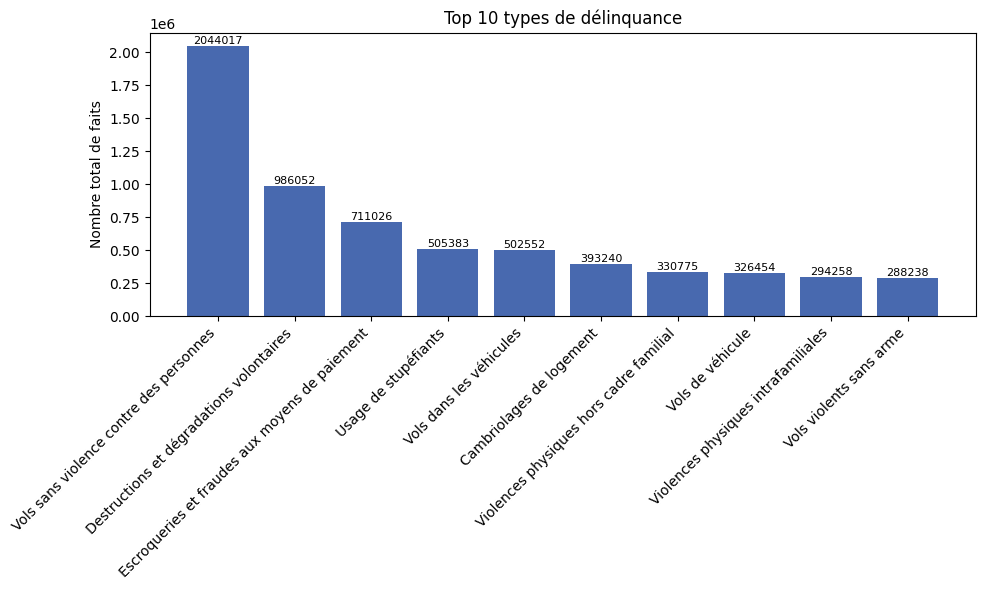

,type_delinquance,nb_faits
13,Vols sans violence contre des personnes,2044017.0
1,Destructions et dégradations volontaires,986052.0
2,Escroqueries et fraudes aux moyens de paiement,711026.0
4,Usage de stupéfiants,505383.0
11,Vols dans les véhicules,502552.0
0,Cambriolages de logement,393240.0
6,Violences physiques hors cadre familial,330775.0
12,Vols de véhicule,326454.0
7,Violences physiques intrafamiliales,294258.0
14,Vols violents sans arme,288238.0


In [16]:
def top_types_delinquance(df, top_n=10):
    """
    Affiche les types de délinquance les plus fréquents et retourne un DataFrame trié.
    """
    if df is None or df.empty:
        print("Le DataFrame est vide ou None !")
        return None
    
    df_top = df.groupby('type_delinquance', as_index=False)['nb_faits'].sum()
    df_top = df_top.sort_values('nb_faits', ascending=False).head(top_n)
    
    print(f"\nTop {top_n} types de délinquance :")
    print(df_top.to_string(index=False))
    
    # Graphique simple
    plt.figure(figsize=(10,6))
    bars = plt.bar(df_top['type_delinquance'], df_top['nb_faits'], color='#4869af')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Nombre total de faits")
    plt.title(f"Top {top_n} types de délinquance")
    
    for bar, nb_faits in zip(bars, df_top['nb_faits']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 f'{int(nb_faits)}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return df_top

# Appel
top_types_delinquance(df_idf, 10)


## Calculer de la délinquence brut (sans prendre en compte le nombre d'habitant)

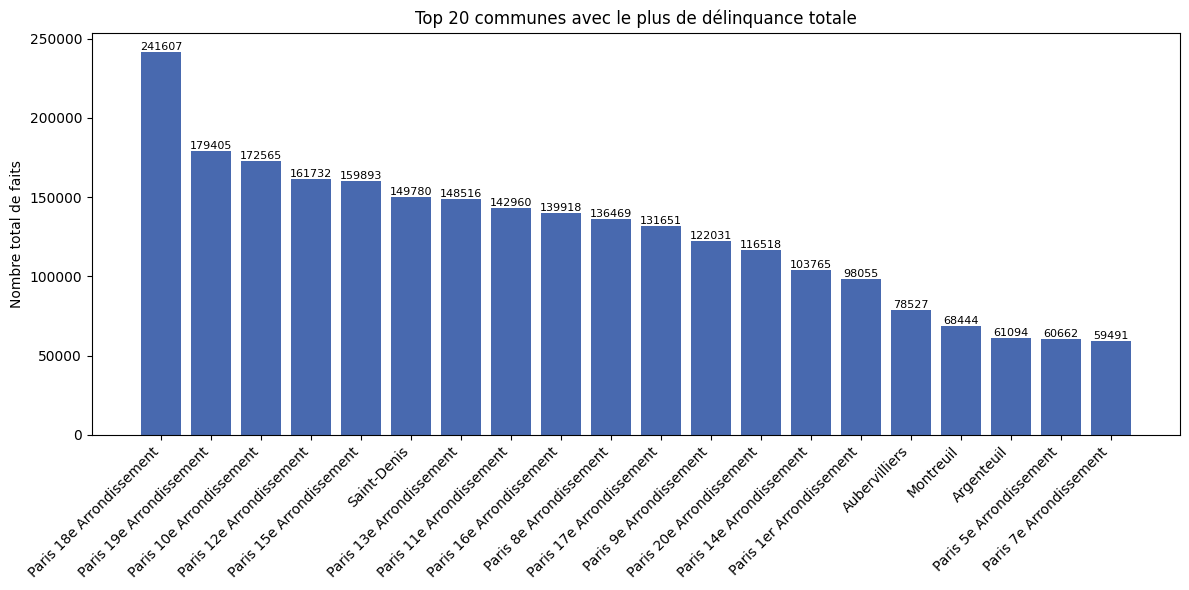

,nom_commune,nb_faits
879,Paris 18e Arrondissement,241607.0
880,Paris 19e Arrondissement,179405.0
871,Paris 10e Arrondissement,172565.0
873,Paris 12e Arrondissement,161732.0
876,Paris 15e Arrondissement,159893.0
986,Saint-Denis,149780.0
874,Paris 13e Arrondissement,148516.0
872,Paris 11e Arrondissement,142960.0
877,Paris 16e Arrondissement,139918.0
889,Paris 8e Arrondissement,136469.0


In [17]:
def graphe_delinquance_nombre(df, top_n=20):
    """
    Affiche un graphe des communes avec le plus de délinquance en nombre total de faits.
    Utilise un DataFrame agrégé pour éviter les doublons.
    Retourne le DataFrame trié pour éventuellement l'utiliser ailleurs.
    """
    if df is None or df.empty:
        print("Le DataFrame est vide ou None !")
        return None

    # ⚡ S'assurer que les doublons sont supprimés et que nb_faits est agrégé par commune
    df_agg = df.groupby('nom_commune', as_index=False)['nb_faits'].sum()

    df_top = df_agg.sort_values('nb_faits', ascending=False).head(top_n)
    
    plt.figure(figsize=(12,6))
    bars = plt.bar(df_top['nom_commune'], df_top['nb_faits'], color='#4869af')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Nombre total de faits")
    plt.title(f"Top {top_n} communes avec le plus de délinquance totale")
    
    # Afficher le nombre de faits **au-dessus** de chaque barre
    for bar, nb_faits in zip(bars, df_top['nb_faits']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 f'{int(nb_faits)}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return df_top

# Appel : utiliser le DataFrame nettoyé et agrégé
graphe_delinquance_nombre(df_idf, 20)


## Top des délinquences en tennant en compte le nombre d'habitant

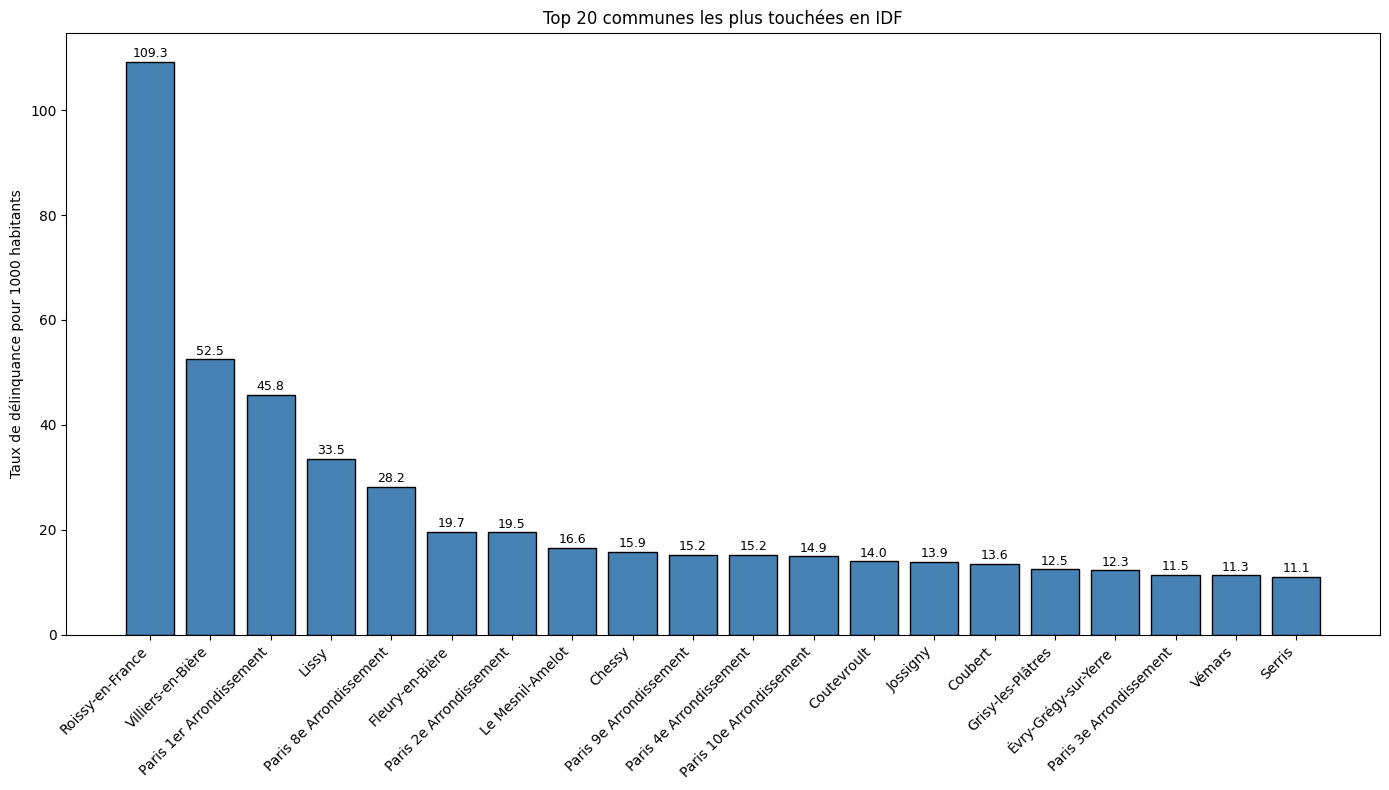

In [18]:
def graphe_delinquance_taux(df, top_n=20):
    """
    Bar chart des communes avec le taux de délinquance le plus élevé,
    avec affichage du taux sur les barres.
    """
    if df is None or df.empty:
        return None

    # Calcul du taux si absent
    if 'taux_1000_habitants' not in df.columns:
        df['taux_1000_habitants'] = (df['nb_faits'] / df['population_commune']) * 1000

    # Agrégation
    df_agg = df.groupby('nom_commune', as_index=False)['taux_1000_habitants'].mean()

    # Top N
    df_top = df_agg.sort_values('taux_1000_habitants', ascending=False).head(top_n)

    # Bar chart
    plt.figure(figsize=(14, 8))
    bars = plt.bar(df_top['nom_commune'], df_top['taux_1000_habitants'], color='steelblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Taux de délinquance pour 1000 habitants")
    plt.title(f"Top {top_n} communes les plus touchées en IDF")

    # Ajout du texte sur les barres
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.1f}", 
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Utilisation
graphe_delinquance_taux(df_idf, top_n=20)


## TOP 50 des communes les plus safes en IDF

In [19]:
def top_communes_safes(df, top_n=150):
    """
    Retourne un DataFrame des communes les plus sûres (nb_faits le plus faible),
    trié du plus sûr au moins sûr.
    """
    if df is None or df.empty:
        print("Le DataFrame est vide ou None !")
        return None

    # Agrégation par commune pour éviter les doublons
    df_agg = df.groupby('nom_commune', as_index=False)['nb_faits'].sum()

    # Filtrer les communes avec au moins un fait pour le classement
    df_agg = df_agg[df_agg['nb_faits'] >= 0]  

    # Tri croissant : nb_faits le plus petit en top
    df_sorted = df_agg.sort_values('nb_faits', ascending=True).head(top_n).reset_index(drop=True)

    # Ajouter un rang
    df_sorted['rang'] = df_sorted.index + 1

    # Réorganiser les colonnes
    df_sorted = df_sorted[['rang', 'nom_commune', 'nb_faits']]

    print(f" Top {top_n} communes les plus sûres :")
    print(df_sorted.to_string(index=False))

    return df_sorted

# Appel
df_top_safe = top_communes_safes(df_idf, 50)


 Top 50 communes les plus sûres :
 rang             nom_commune  nb_faits
    1    Abbéville-la-Rivière       0.0
    2         Paray-Douaville       0.0
    3              Le Vaudoué       0.0
    4          Civry-la-Forêt       0.0
    5 Le Tremblay-sur-Mauldre       0.0
    6                Chérence       0.0
    7              Gommecourt       0.0
    8                   Paroy       0.0
    9         Passy-sur-Seine       0.0
   10                Châtenoy       0.0
   11   Le Tertre-Saint-Denis       0.0
   12      Châtenay-en-France       0.0
   13       Le Tartre-Gaudran       0.0
   14            Goupillières       0.0
   15            Châteaubleau       0.0
   16           Perdreauville       0.0
   17            Pierre-Levée       0.0
   18   Plessis-Saint-Benoist       0.0
   19                 Choisel       0.0
   20                  Poigny       0.0
   21       Chevry-en-Sereine       0.0
   22     Le Plessis-l'Évêque       0.0
   23              Gironville       0.0
   24 

## Sauvegarde du dataset

In [20]:
df_idf.to_csv("data/cleaned/delinquance_nettoyes.csv", index=False, encoding='utf-8')
print(f"Fichier exporté : delinquance_nettoyes.csv ({len(df_idf)} lignes)")

Fichier exporté : delinquance_nettoyes.csv (92783 lignes)


## Synthèse du nettoyage

### Résumé des transformations effectuées

1. **Données brutes initiales :** 399786 lignes, 9colonnes  
2. **Après filtrages sur le départements iles de frances uniquement:** 
   14044lignes  

3. **Colonnes finales (6) :**  
   'code_commune', 'type_delinquance','unite_compte','nb_faits','taux_1000_habitants','population_commune','nb_logements'
   

### Recommandations pour l'analyse

<!-- COMPLÉTEZ ICI: Notez les points importants pour l'analyse suivante -->
<!-- - Variables les plus pertinentes identifiées -->
<!-- - Limitations des données -->
<!-- - Suggestions pour les widgets -->

---

**Notebook préparé par :**
- Ashley OHNONA
- Harisoa RANDRIANASOLO
- Fairouz YOUDARENE
- Jennifer ZAHORA

**Date :** 17 Octobre 2025

**Dataset final :** `donnees_nettoyees.csv`